In [46]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import brewer2mpl

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [47]:

# create fROI, extract FIR timeseries, write to dataframe
!. /home/despoB/kaihwang/bin/TDSigEI/make_indiv_fROI.sh
!. /home/despoB/kaihwang/bin/TDSigEI/extract_FIR_ts.sh


++ 3dcalc: AFNI version=AFNI_2011_12_21_1014 (Aug  4 2015) [64-bit]
++ Authored by: A cast of thousands
*+ WARNING: Template space of dataset /home/despoB/kaihwang/TRSE/TDSigEI/ROIs/Group_FFA_mask.nii.gz does not match space of first dataset
Continuing anyway, but be sure the datasets really do match
++ Output dataset ./FFAmasked.nii.gz
++ 3dcalc: AFNI version=AFNI_2011_12_21_1014 (Aug  4 2015) [64-bit]
++ Authored by: A cast of thousands
*+ WARNING: Template space of dataset /home/despoB/kaihwang/TRSE/TDSigEI/ROIs/Group_PPA_mask.nii.gz does not match space of first dataset
Continuing anyway, but be sure the datasets really do match
++ Output dataset ./PPAmasked.nii.gz
++ 3dcalc: AFNI version=AFNI_2011_12_21_1014 (Aug  4 2015) [64-bit]
++ Authored by: A cast of thousands
*+ WARNING: Template space of dataset /home/despoB/kaihwang/TRSE/TDSigEI/ROIs/Group_FFA_mask.nii.gz does not match space of first dataset
Continuing anyway, but be sure the datasets really do match
++ Output dataset ./

In [48]:
cd /home/despoB/kaihwang/bin/TDSigEI

/home/despoB/kaihwang/bin/TDSigEI


In [49]:
%run FIR_dataframe.py

In [50]:
cd /home/despoB/kaihwang/bin/TDSigEI

/home/despoB/kaihwang/bin/TDSigEI


In [51]:
#load dataframe, calculate mean and SEM
FIR_df = pd.read_csv('Data/FIR_df.csv')

mean_df = FIR_df.groupby(['ROI','Condition','Volume']).aggregate(np.mean).reset_index()
sem_df = FIR_df.groupby(['ROI','Condition','Volume']).aggregate(scipy.stats.sem).reset_index()

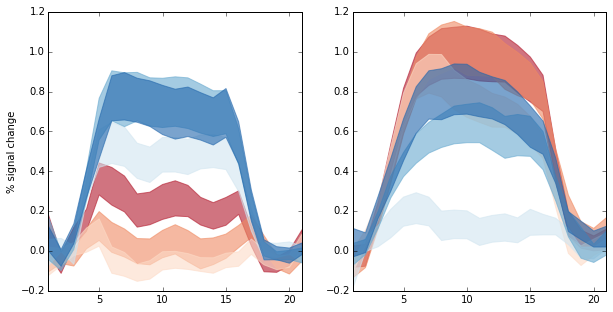

In [52]:
#conditions
ROIs = ['FFA', 'PPA']
Conditions =['FH', 'Fo', 'Fp', 'Hp', 'Ho', 'HF']
x = np.arange(1,22)
#get colormap
cmap = brewer2mpl.get_map('RdBu','diverging', 6)
plt.figure(1)
plt.figure(figsize=(10,5))
for r, roi in enumerate(ROIs):
    plt.subplot(1, 2, r)
    
    for i, c in enumerate(Conditions):
        y = np.array(mean_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        error = np.array(sem_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        #plt.plot(x, y, color = cmap.hex_colors[i],  )
       
        plt.fill_between(x, y-error, y+error, alpha=0.6, edgecolor=cmap.hex_colors[i], 
                     facecolor=cmap.hex_colors[i], label=c)

        plt.ylim(-0.2, 1.2)
        plt.xlim(1, 21)
        
        #plt.xlabel(roi)

plt.ylabel('% signal change')